In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))
mnist=input_data.read_data_sets('/tmp/data/',one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


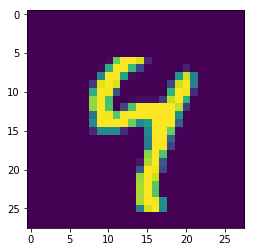

In [8]:
images=mnist.train.images
image_0=np.reshape(images[2],(28,28))
image_0.shape
import matplotlib.pyplot as plt
plt.imshow(image_0)
plt.show()
labels=mnist.train.labels
pixls=images.shape[1]
num_examples=mnist.train.num_examples

In [3]:
beat_num=1024
num=0
record=0
writer= tf.python_io.TFRecordWriter('cc/output.tfrecords-'+str(record))
for index in range(num_examples):
    num=num+1
    if(num>beat_num):
        num=1
        record=record+1
        filename='cc/output.tfrecords-'+str(record)
        writer=tf.python_io.TFRecordWriter(filename)
    image_raw=images[index].tostring()
    example=tf.train.Example(features=tf.train.Features(feature={
        'pixels':_int64_feature(pixls),
        'label':_int64_feature(np.argmax(labels[index])),
        'image_raw':_bytes_feature(image_raw)
    }))
    writer.write(example.SerializeToString())
writer.close()
print("文件已经保存！")

文件已经保存！


In [15]:
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import tensorflow as tf
data_path='./cc/output.tfrecords*'
data_paths=tf.gfile.Glob(data_path)
def read_and_decode(data_paths):
    reader=tf.TFRecordReader()
    filename_queue=tf.train.string_input_producer(data_paths)#读入流中
    _,serialized_example=reader.read(filename_queue)
    features=tf.parse_single_example(
        serialized_example,
        features={
            'image_raw':tf.FixedLenFeature([],tf.string),
            'pixels':tf.FixedLenFeature([],tf.int64),
            'label':tf.FixedLenFeature([],tf.int64)
        }
    )
    img=tf.decode_raw(features['image_raw'],tf.uint8)
    img=tf.reshape(img,[28,28,1])
    labels=tf.cast(features['label'],tf.int32)
    pixls=tf.cast(features['pixels'],tf.int32)
    return images,labels


In [17]:
images,labels=read_and_decode(data_paths)

In [19]:
len(images)

55000

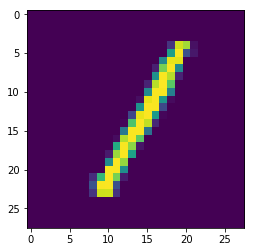

In [20]:
import numpy as np
image=np.reshape(images[50000],(28,28))
plt.imshow(image)
plt.show()

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess,coord)
    for i in range(10):
        image,label=sess.run([images,labels])
        print(image)
    coord.request_stop()
    coord.join(threads)

In [16]:
image

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [5]:
import numpy as np
image=np.reshape(image,(28,28))
plt.imshow(image)
plt.show()

ValueError: cannot reshape array of size 3136 into shape (28,28)